In [1]:
%matplotlib inline
from decay_compare import *
from pyne import data
from pyne import rxname

/home/scopatz/miniconda/lib/python3.6/importlib/_bootstrap.py:205: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/home/scopatz/miniconda/lib/python3.6/importlib/_bootstrap.py:205: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)


In [2]:
%%time
batemans, crammeds, diagexps = run_nuclides(verbose=True)

Running nuc H1
Running nuc H2
Running nuc H3
Running nuc H4
Running nuc H5
Running nuc H6
Running nuc H7
Running nuc He3
Running nuc He4
Running nuc He5
Running nuc He6
Running nuc He7
Running nuc He8
Running nuc He9
Running nuc He10
Running nuc Li3
Running nuc Li4
Running nuc Li5
Running nuc Li6
Running nuc Li7
Running nuc Li8
Running nuc Li9
Running nuc Li10
Running nuc Li11
Running nuc Li12
Running nuc Li13
Running nuc Be5
Running nuc Be6
Running nuc Be7
Running nuc Be8
Running nuc Be9
Running nuc Be10
Running nuc Be11
Running nuc Be12
Running nuc Be13
Running nuc Be14
Running nuc Be15
Running nuc Be16
Running nuc B6
Running nuc B7
Running nuc B8
Running nuc B9
Running nuc B10
Running nuc B11
Running nuc B12
Running nuc B13
Running nuc B14
Running nuc B15
Running nuc B16
Running nuc B17
Running nuc B18
Running nuc B19
Running nuc B20
Running nuc B21
Running nuc C8
Running nuc C9
Running nuc C10
Running nuc C11
Running nuc C12
Running nuc C13
Running nuc C14
Running nuc C15
Running n

Running nuc Mn55
Running nuc Mn56
Running nuc Mn57
Running nuc Mn58
Running nuc Mn59
Running nuc Mn60
Running nuc Mn61
Running nuc Mn62
Running nuc Mn63
Running nuc Mn64
Running nuc Mn65
Running nuc Mn66
Running nuc Mn67
Running nuc Mn68
Running nuc Mn69
Running nuc Mn70
Running nuc Mn71
Running nuc Fe45
Running nuc Fe46
Running nuc Fe47
Running nuc Fe48
Running nuc Fe49
Running nuc Fe50
Running nuc Fe51
Running nuc Fe52
Running nuc Fe53
Running nuc Fe54
Running nuc Fe55
Running nuc Fe56
Running nuc Fe57
Running nuc Fe58
Running nuc Fe59
Running nuc Fe60
Running nuc Fe61
Running nuc Fe62
Running nuc Fe63
Running nuc Fe64
Running nuc Fe65
Running nuc Fe66
Running nuc Fe67
Running nuc Fe68
Running nuc Fe69
Running nuc Fe70
Running nuc Fe71
Running nuc Fe72
Running nuc Fe73
Running nuc Fe74
Running nuc Co47
Running nuc Co48
Running nuc Co49
Running nuc Co50
Running nuc Co51
Running nuc Co52
Running nuc Co53
Running nuc Co54
Running nuc Co55
Running nuc Co56
Running nuc Co57
Running nuc Co

Running nuc Y90M
Running nuc Y91
Running nuc Y91M
Running nuc Y92
Running nuc Y93
Running nuc Y94
Running nuc Y95
Running nuc Y96
Running nuc Y97
Running nuc Y98
Running nuc Y99
Running nuc Y100
Running nuc Y101
Running nuc Y102
Running nuc Y103
Running nuc Y104
Running nuc Y105
Running nuc Y106
Running nuc Y107
Running nuc Y108
Running nuc Y109
Running nuc Zr78
Running nuc Zr79
Running nuc Zr80
Running nuc Zr81
Running nuc Zr82
Running nuc Zr83
Running nuc Zr84
Running nuc Zr85
Running nuc Zr86
Running nuc Zr87
Running nuc Zr88
Running nuc Zr89
Running nuc Zr90
Running nuc Zr90M
Running nuc Zr91
Running nuc Zr92
Running nuc Zr93
Running nuc Zr94
Running nuc Zr95
Running nuc Zr96
Running nuc Zr97
Running nuc Zr98
Running nuc Zr99
Running nuc Zr100
Running nuc Zr101
Running nuc Zr102
Running nuc Zr103
Running nuc Zr104
Running nuc Zr105
Running nuc Zr106
Running nuc Zr107
Running nuc Zr108
Running nuc Zr109
Running nuc Zr110
Running nuc Zr111
Running nuc Zr112
Running nuc Nb81
Running n

Running nuc Sn117M
Running nuc Sn118
Running nuc Sn119
Running nuc Sn119M
Running nuc Sn120
Running nuc Sn121
Running nuc Sn121M
Running nuc Sn122
Running nuc Sn123
Running nuc Sn123M
Running nuc Sn124
Running nuc Sn125
Running nuc Sn125M
Running nuc Sn126
Running nuc Sn127
Running nuc Sn127M
Running nuc Sn128
Running nuc Sn129
Running nuc Sn129M
Running nuc Sn130
Running nuc Sn131
Running nuc Sn132
Running nuc Sn133
Running nuc Sn134
Running nuc Sn135
Running nuc Sn136
Running nuc Sn137
Running nuc Sn138
Running nuc Sb103
Running nuc Sb104
Running nuc Sb105
Running nuc Sb106
Running nuc Sb107
Running nuc Sb108
Running nuc Sb109
Running nuc Sb110
Running nuc Sb111
Running nuc Sb112
Running nuc Sb113
Running nuc Sb114
Running nuc Sb115
Running nuc Sb116
Running nuc Sb117
Running nuc Sb118
Running nuc Sb119
Running nuc Sb120
Running nuc Sb121
Running nuc Sb122
Running nuc Sb122M
Running nuc Sb123
Running nuc Sb124
Running nuc Sb124M
Running nuc Sb125
Running nuc Sb126
Running nuc Sb126M


Running nuc Nd159
Running nuc Nd160
Running nuc Nd161
Running nuc Pm126
Running nuc Pm127
Running nuc Pm128
Running nuc Pm129
Running nuc Pm130
Running nuc Pm131
Running nuc Pm132
Running nuc Pm133
Running nuc Pm134
Running nuc Pm135
Running nuc Pm136
Running nuc Pm137
Running nuc Pm138
Running nuc Pm139
Running nuc Pm140
Running nuc Pm141
Running nuc Pm142
Running nuc Pm143
Running nuc Pm144
Running nuc Pm145
Running nuc Pm146
Running nuc Pm147
Running nuc Pm148
Running nuc Pm148M
Running nuc Pm149
Running nuc Pm149M
Running nuc Pm150
Running nuc Pm151
Running nuc Pm152
Running nuc Pm152M
Running nuc Pm153
Running nuc Pm154
Running nuc Pm154M
Running nuc Pm155
Running nuc Pm156
Running nuc Pm157
Running nuc Pm158
Running nuc Pm159
Running nuc Pm160
Running nuc Pm161
Running nuc Pm162
Running nuc Pm163
Running nuc Sm128
Running nuc Sm129
Running nuc Sm130
Running nuc Sm131
Running nuc Sm132
Running nuc Sm133
Running nuc Sm134
Running nuc Sm135
Running nuc Sm136
Running nuc Sm137
Runnin

Running nuc Hf186
Running nuc Hf187
Running nuc Hf188
Running nuc Hf189
Running nuc Ta155
Running nuc Ta156
Running nuc Ta157
Running nuc Ta158
Running nuc Ta159
Running nuc Ta160
Running nuc Ta161
Running nuc Ta162
Running nuc Ta163
Running nuc Ta164
Running nuc Ta165
Running nuc Ta166
Running nuc Ta167
Running nuc Ta168
Running nuc Ta169
Running nuc Ta170
Running nuc Ta171
Running nuc Ta172
Running nuc Ta173
Running nuc Ta174
Running nuc Ta175
Running nuc Ta176
Running nuc Ta177
Running nuc Ta178
Running nuc Ta179
Running nuc Ta180
Running nuc Ta181
Running nuc Ta182
Running nuc Ta182M
Running nuc Ta183
Running nuc Ta184
Running nuc Ta185
Running nuc Ta186
Running nuc Ta187
Running nuc Ta188
Running nuc Ta189
Running nuc Ta190
Running nuc Ta191
Running nuc Ta192
Running nuc W157
Running nuc W158
Running nuc W159
Running nuc W160
Running nuc W161
Running nuc W162
Running nuc W163
Running nuc W164
Running nuc W165
Running nuc W166
Running nuc W167
Running nuc W168
Running nuc W169
Runn

Running nuc Bi208
Running nuc Bi209
Running nuc Bi210
Running nuc Bi210M
Running nuc Bi211
Running nuc Bi212
Running nuc Bi213
Running nuc Bi214
Running nuc Bi215
Running nuc Bi216
Running nuc Bi217
Running nuc Bi218
Running nuc Bi219
Running nuc Bi220
Running nuc Bi221
Running nuc Bi222
Running nuc Bi223
Running nuc Bi224
Running nuc Po186
Running nuc Po187
Running nuc Po188
Running nuc Po189
Running nuc Po190
Running nuc Po191
Running nuc Po192
Running nuc Po193
Running nuc Po194
Running nuc Po195
Running nuc Po196
Running nuc Po197
Running nuc Po198
Running nuc Po199
Running nuc Po200
Running nuc Po201
Running nuc Po202
Running nuc Po203
Running nuc Po204
Running nuc Po205
Running nuc Po206
Running nuc Po207
Running nuc Po208
Running nuc Po209
Running nuc Po210
Running nuc Po211
Running nuc Po211M
Running nuc Po212
Running nuc Po213
Running nuc Po214
Running nuc Po215
Running nuc Po216
Running nuc Po217
Running nuc Po218
Running nuc Po219
Running nuc Po220
Running nuc Po221
Running 

Running nuc Cf246
Running nuc Cf247
Running nuc Cf248
Running nuc Cf249
Running nuc Cf250
Running nuc Cf251
Running nuc Cf252
Running nuc Cf253
Running nuc Cf254
Running nuc Cf255
Running nuc Cf256
Running nuc Es239
Running nuc Es240
Running nuc Es241
Running nuc Es242
Running nuc Es243
Running nuc Es244
Running nuc Es245
Running nuc Es246
Running nuc Es247
Running nuc Es248
Running nuc Es249
Running nuc Es250
Running nuc Es251
Running nuc Es252
Running nuc Es253
Running nuc Es254
Running nuc Es254M
Running nuc Es255
Running nuc Es255M
Running nuc Es256
Running nuc Es257
Running nuc Es258
Running nuc Fm241
Running nuc Fm242
Running nuc Fm243
Running nuc Fm244
Running nuc Fm245
Running nuc Fm246
Running nuc Fm247
Running nuc Fm248
Running nuc Fm249
Running nuc Fm250
Running nuc Fm251
Running nuc Fm252
Running nuc Fm253
Running nuc Fm254
Running nuc Fm255
Running nuc Fm256
Running nuc Fm257
Running nuc Fm258
Running nuc Fm259
Running nuc Fm260
Running nuc Md245
Running nuc Md246
Running 

In [3]:
NNUCS = len(crammeds)

In [4]:
b = np.zeros((NTIMES, NNUCS), dtype=float)
c = np.zeros((NTIMES, NNUCS), dtype=float)
d = np.zeros((NTIMES, NNUCS), dtype=float)
for n, nuc in enumerate(cram.NUCS):
    b[:, n] = batemans[nuc][nuc]
    c[:, n] = crammeds[nuc][nuc]
    d[:, n] = diagexps[nuc][nuc]

In [5]:
diagdiff = np.abs(d - c)
mu_diagdiff = diagdiff.mean(axis=1)
sigma_diagdiff = diagdiff.std(axis=1)

In [6]:
sigma_diagdiff

array([  0.000000000000000000e+00,   3.794932106865348635e-13,
         3.568615549342876443e-13,   3.589371511754310760e-13,
         3.339192356737146756e-13,   3.273532171519898016e-13,
         3.089658758993763921e-13,   2.922717401165532424e-13,
         2.622779467030244305e-13,   2.332288556062418949e-13,
         2.290255760305759188e-13,   2.109343947809566905e-13,
         1.881951527237073157e-13,   1.657452398257157857e-13,
         1.630490412179689695e-13,   1.408416928882749306e-13,
         1.477665143481206768e-13,   1.301260698541111036e-13,
         1.363570287226157404e-13,   1.290121911693694846e-13,
         1.134037353200907674e-13,   1.138108811539474132e-13,
         1.124947303368158916e-13,   1.085271582506691857e-13,
         1.075011500203338088e-13,   1.005693159928761357e-13,
         1.017056636913420538e-13,   1.131629829570021141e-13])

# Difference plot for all nuclides

The red line is the mean difference with $1\sigma$ error bars

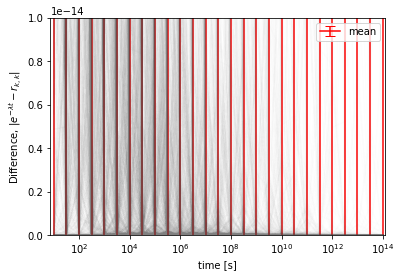

In [7]:
plt.plot(TIMES[1:], diagdiff[1:, :], color='gray', alpha=0.01)
plt.errorbar(TIMES[1:], mu_diagdiff[1:], yerr=sigma_diagdiff[1:], color='red', capsize=5, label='mean')
plt.axis([TIMES[1]*0.75, TIMES[-1]*1.25, 0.0, 1e-14])
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('time [s]')
plt.ylabel('Difference, $\\left|e^{-\\lambda t} - r_{k,k}\\right|$')
plt.legend(loc=0)

# Bateman Comparison

In [8]:
def bateman_diff_plot(nuc, batemans, crammeds):
    bateman = batemans[nuc]
    crammed = crammeds[nuc]
    diff = diff_nuclide(bateman, crammed, abs=True)
    #color = plt.cm.magma(np.linspace(0, 1, len(diff)))
    #for nuc, c in zip(diff, color):
        #plt.plot(TIMES, crammed[nuc], color=c, ls='-', label=nuc)
        #plt.plot(TIMES, crammed[nuc], color=c, ls='--')
    d = np.zeros((NTIMES, len(diff)), dtype=float)
    for i, (n, arr) in enumerate(diff.items()):
        if data.fpyield(nuc, n) > 0 or crammed[n].max() < 1e-8:
            print('skipping', n)
            continue
        plt.plot(TIMES, arr, label=n)
        d[:,i] = arr
    mu = d.mean(axis=1)
    sigma = d.std(axis=1)
    #plt.errorbar(TIMES, mu, yerr=sigma, capsize=5, color='black', label='mean')
    plt.xscale('log')
    #plt.yscale('log')
    #plt.axis([TIMES[1]*0.75, TIMES[-1]*1.25, 1e-18, 1e-6])
    plt.xlabel('time [s]')
    plt.ylabel('Difference, $\\left|e^{-\\lambda t} - r_{k,k}\\right|$')
    plt.legend(loc=0)

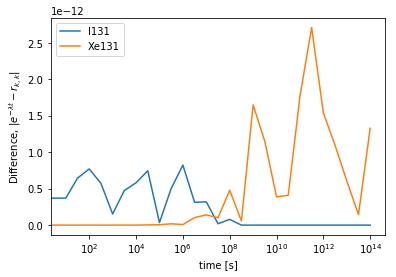

In [9]:
bateman_diff_plot('I131', batemans=batemans, crammeds=crammeds)

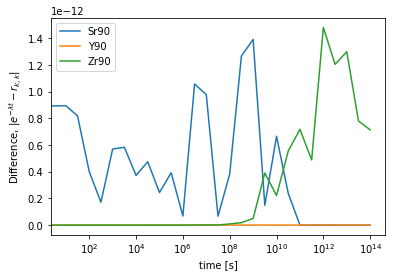

In [10]:
bateman_diff_plot('Sr90', batemans=batemans, crammeds=crammeds)

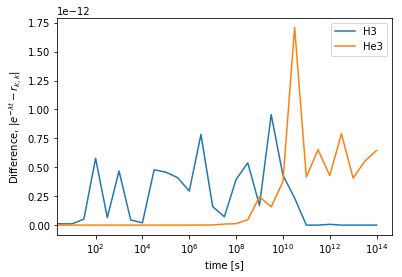

In [11]:
bateman_diff_plot('H3', batemans=batemans, crammeds=crammeds)

skipping Kr83
skipping Mo95
skipping Tc99
skipping Ru101
skipping Ru103
skipping Ru106
skipping Rh105
skipping Rh106
skipping Pd107
skipping Pd108
skipping Ag107
skipping Ag109
skipping Cd113
skipping In115
skipping Sb125
skipping Te127
skipping I135
skipping Xe131
skipping Xe134
skipping Xe135
skipping Xe136
skipping Cs133
skipping Cs134
skipping Cs137
skipping Nd143
skipping Nd145
skipping Pm147
skipping Pm148
skipping Pm149
skipping Sm150
skipping Sm151
skipping Sm152
skipping Eu151
skipping Eu152
skipping Eu153
skipping Eu154
skipping Eu155
skipping Gd154
skipping Gd156
skipping Gd157
skipping Gd158
skipping Dy160
skipping Dy161
skipping Dy162
skipping Dy163
skipping Dy164
skipping Ho165
skipping Er166
skipping Er167
skipping Tl207
skipping Pb209
skipping Pb211
skipping Bi211
skipping Bi215
skipping Po211
skipping Po215
skipping At215
skipping At219
skipping Rn219
skipping Fr223
skipping Ra223
skipping Ra227
skipping Th227
skipping Th231
skipping I127
skipping Cs135
skipping Sm154


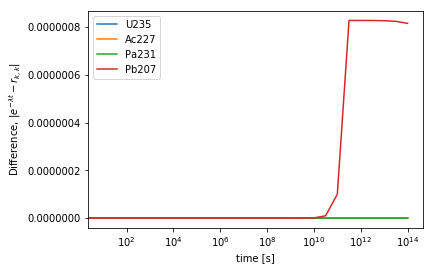

In [12]:
bateman_diff_plot('U235', batemans=batemans, crammeds=crammeds)

In [13]:
data.fpyield('U235', 'I131')

0.0